# Price Analysis and Prediction of Pizza using Machine Learning Algorithms !

### _There’s a reason why pizza is so popular. Humans are drawn to foods that are fatty and sweet and rich and complex.<br> Pizza has all of these components. Cheese is fatty, meat toppings tend to be rich, and the sauce is sweet._

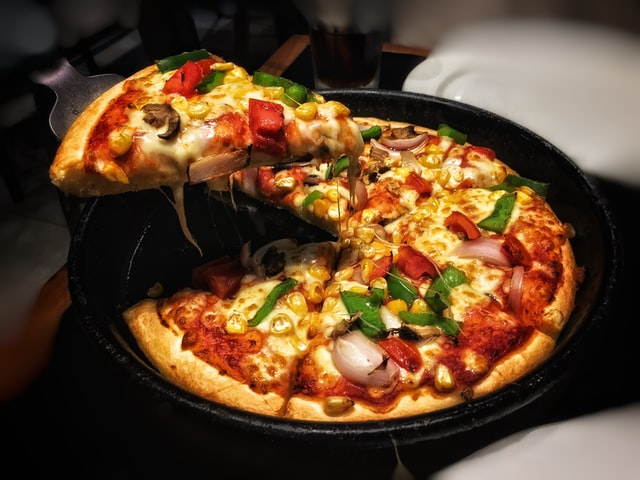

### _Pizza toppings are also packed with a compound called glutamate, which can be found in the tomatoes, cheese, pepperoni and sausage. <br><br> When glutamate hits our tongues, it tells our brains to get excited – and to crave more of it.<br> This compound actually causes our mouths to water in anticipation of the next bite._

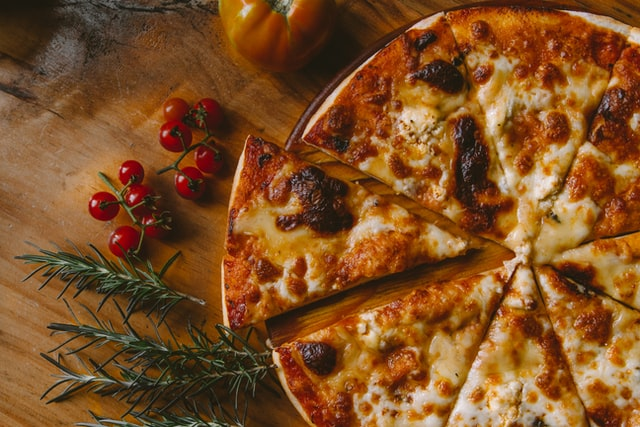

### _Then there are the combinations of ingredients. Cheese and tomato sauce are like a perfect marriage. On their own, they taste pretty good. <br>But according to culinary scientists, they contain flavor compounds that taste even better when eaten together.<br><br>With bread, cheese and tomato sauce as its base, pizza might seem like a simple food._

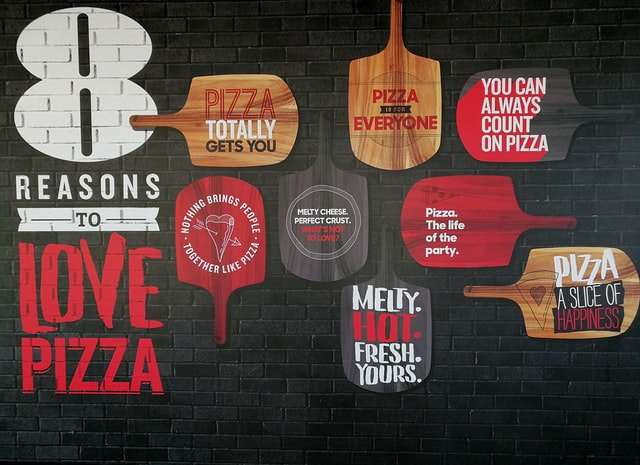

---
---

## _Importing Libraries_

In [1]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## _Reading the datasets_

In [44]:
df1 = pd.read_csv('pizza price data.csv')

In [45]:
df = df1.drop(['price_rupiah'], axis = 1)

In [46]:
dfn = pd.read_csv('pizza nutrient data.csv')

In [47]:
df.head()

,Pizza,diameter,topping,variant,size,extra_sauce,extra_cheese,price_inr
0,Alfredos,22.0,chicken,double_signature,jumbo,yes,yes,1214.5
1,Alfredos,20.0,papperoni,double_signature,jumbo,yes,yes,1023.3
2,Alfredos,16.0,mushrooms,double_signature,reguler,yes,yes,620.2
3,Alfredos,14.0,smoked beef,double_signature,reguler,yes,no,801.0
4,Alfredos,18.0,mozzarella,double_signature,jumbo,yes,no,1281.7


## _Checking for the Null values_

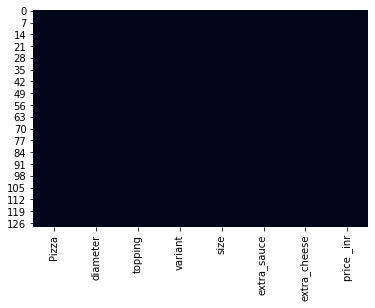

In [11]:
sns.heatmap(df.isnull(), cbar=False)

##### As it seems, no null values to take care of .
---

### _Exploratory data Analysis and Visualization_

In [48]:
df.describe()

,diameter,price_inr
count,129.000000,129.000000
mean,12.976744,450.390698
std,3.272674,231.039615
min,8.000000,121.400000
25%,12.000000,263.600000
50%,12.000000,403.100000
75%,14.000000,542.600000
max,22.000000,1281.700000


## _Using correlation for Heatmap_

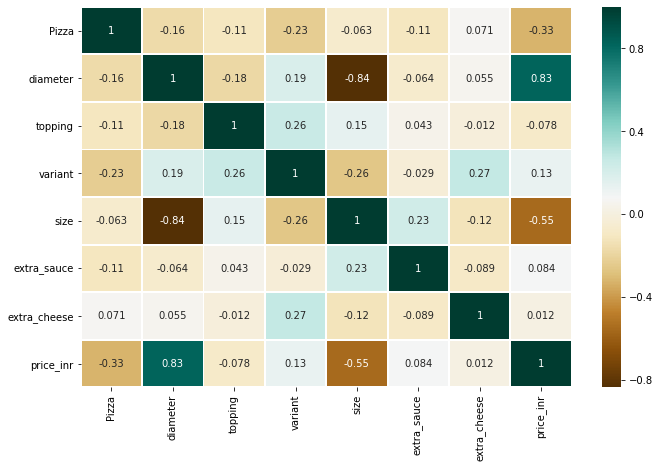

In [100]:
corrmat = df.corr()
corr_features = corrmat.index
plt.figure(figsize=(11,7))
g=sns.heatmap(df[corr_features].corr(),annot=True, linewidth =.9 , cmap="BrBG")

Text(0.5, 1.0, 'Toppings analysis :')

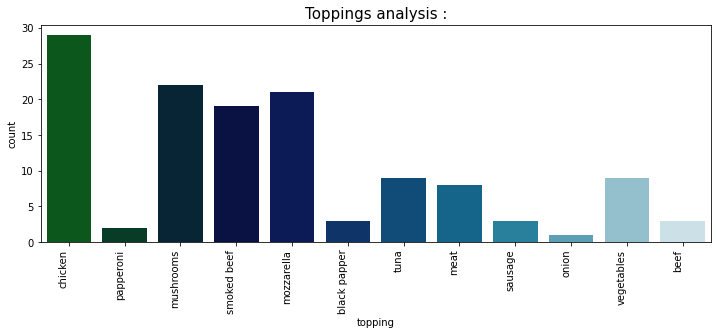

In [20]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='topping',data=df, palette='ocean')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Toppings analysis :", size =15)

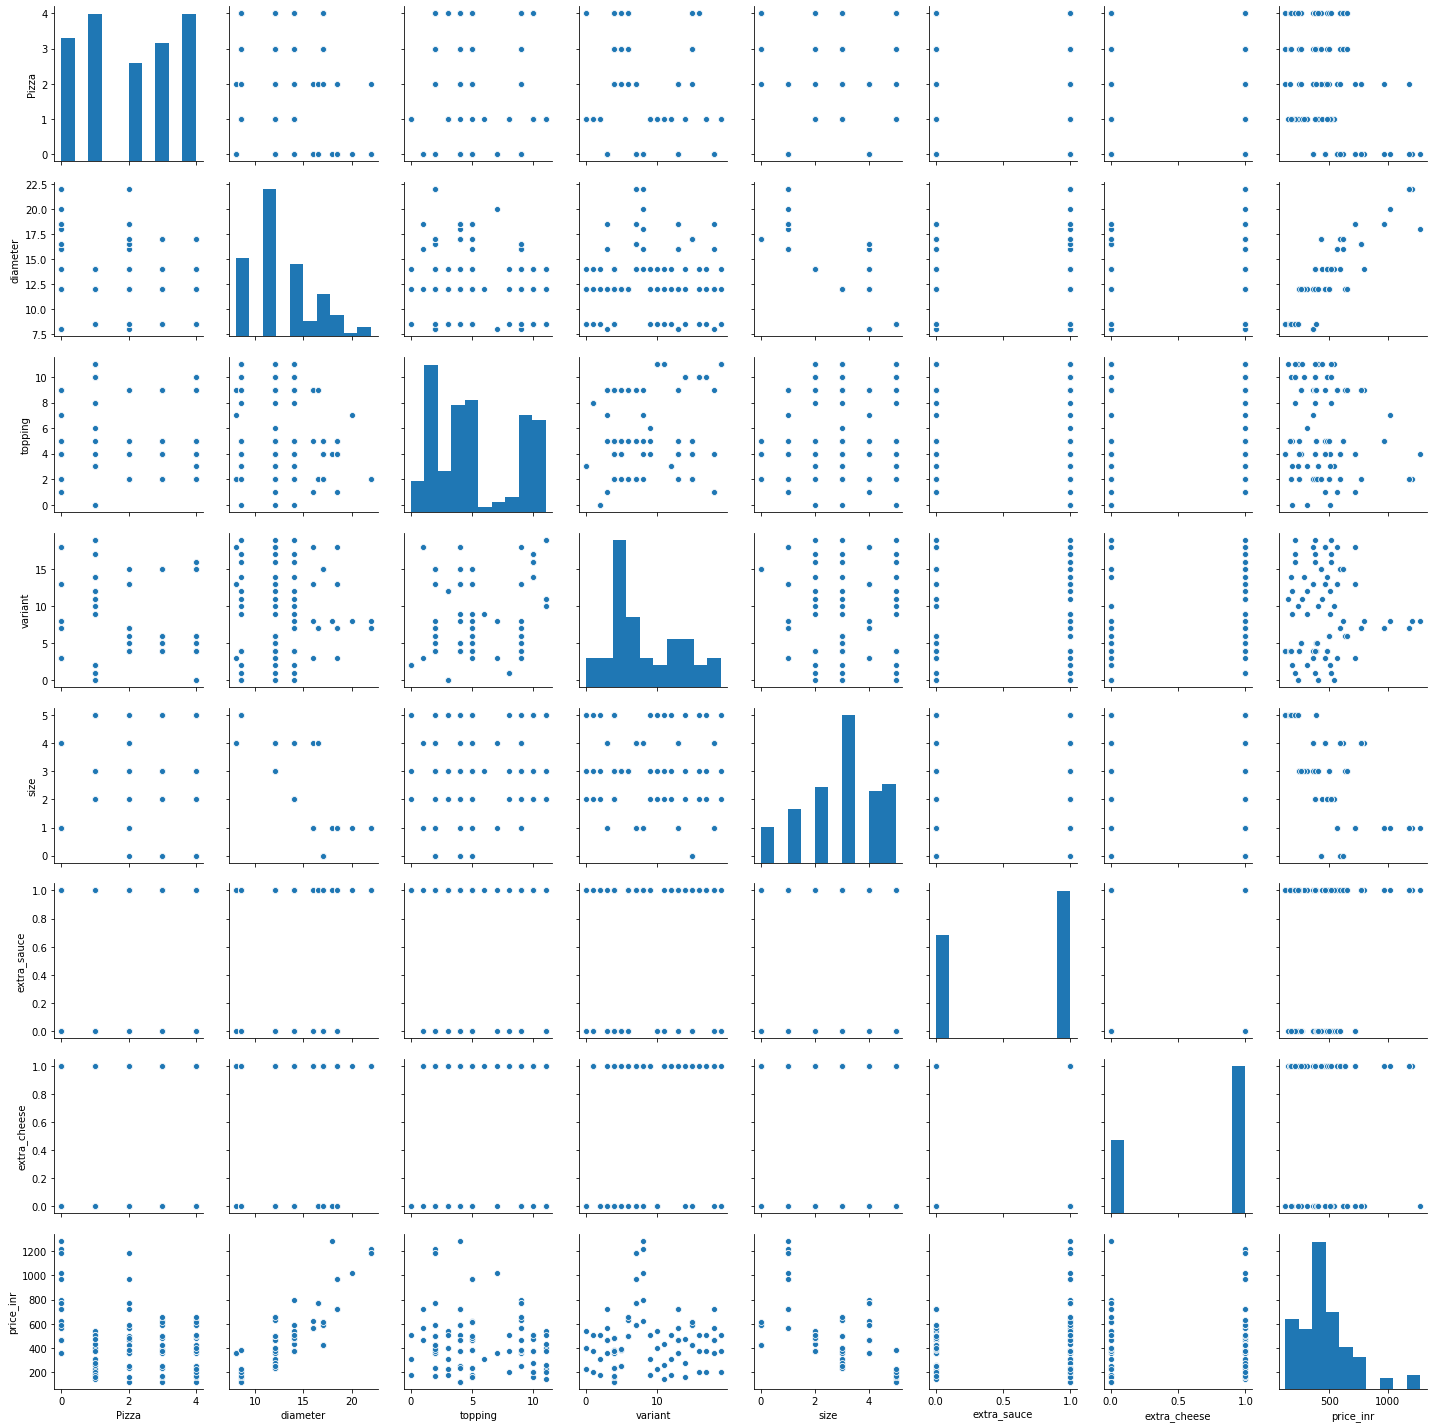

In [102]:
sns.pairplot(df)
plt.show()

Text(0.5, 1.0, 'Analyzing the Price range of pizza')

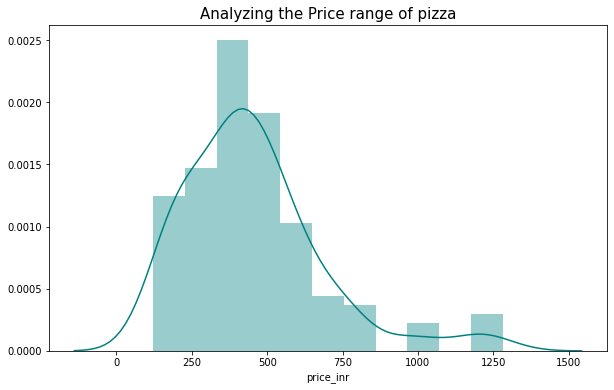

In [52]:
plt.figure(figsize=(10,6))
sns.distplot(df.price_inr, color ="teal")
plt.title("Analyzing the Price range of pizza", size =15)

Text(0.5, 1.0, 'PIZZA PLACES providing sizes:')

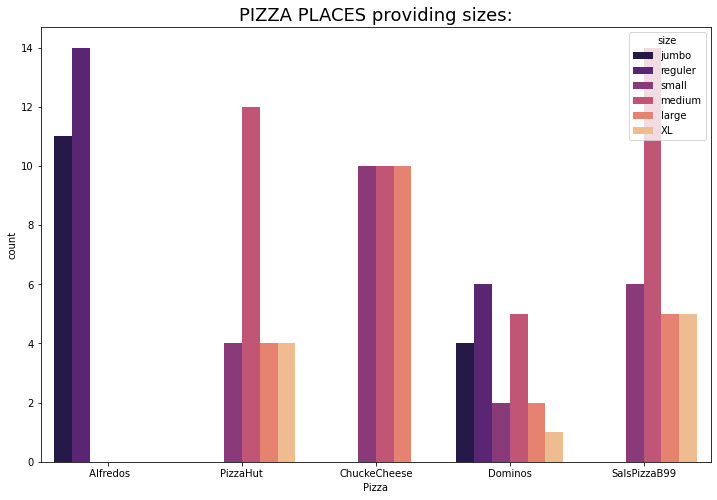

In [90]:
plt.figure(figsize=(12,8))
g = sns.countplot(x='Pizza',data=df, palette='magma', hue='size')
plt.title("PIZZA PLACES providing sizes:", size =18)

Text(0.5, 1.0, 'Frequency of diameters of pizza :')

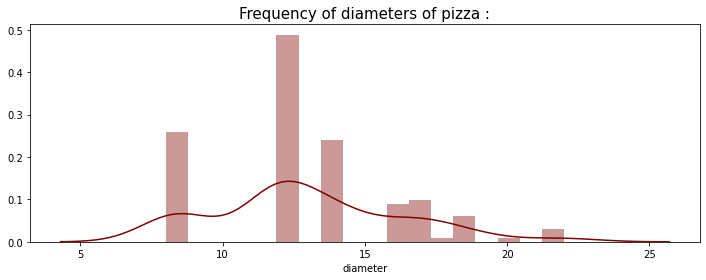

In [57]:
plt.figure(figsize=(12,4))
g = sns.distplot(df.diameter, color ="maroon")
plt.title("Frequency of diameters of pizza :", size =15)

Text(0.5, 1.0, 'Different variants these pizza places has to offer :')

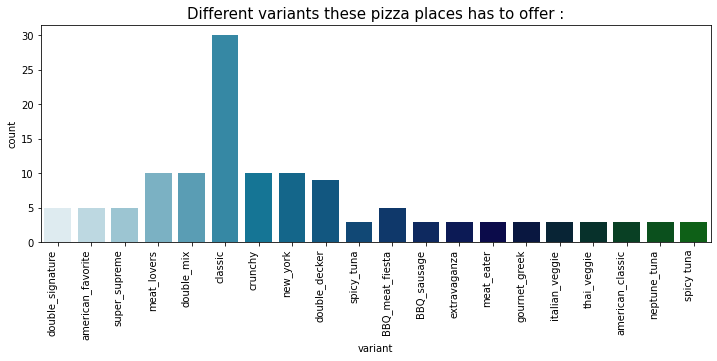

In [61]:
plt.figure(figsize=(12,4))
g = sns.countplot(x='variant',data=df, palette='ocean_r')
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title("Different variants these pizza places has to offer :", size =15)

---
---
# Now,
## _Visualizing Nutritional Values:_

In [68]:
dfn.head()

,brand,id,mois,prot,fat,ash,sodium,carb,cal
0,A,14069,27.82,21.43,44.87,5.11,1.77,0.77,4.93
1,A,14053,28.49,21.26,43.89,5.34,1.79,1.02,4.84
2,A,14025,28.35,19.99,45.78,5.08,1.63,0.80,4.95
3,A,14016,30.55,20.15,43.13,4.79,1.61,1.38,4.74
4,A,14005,30.49,21.28,41.65,4.82,1.64,1.76,4.67


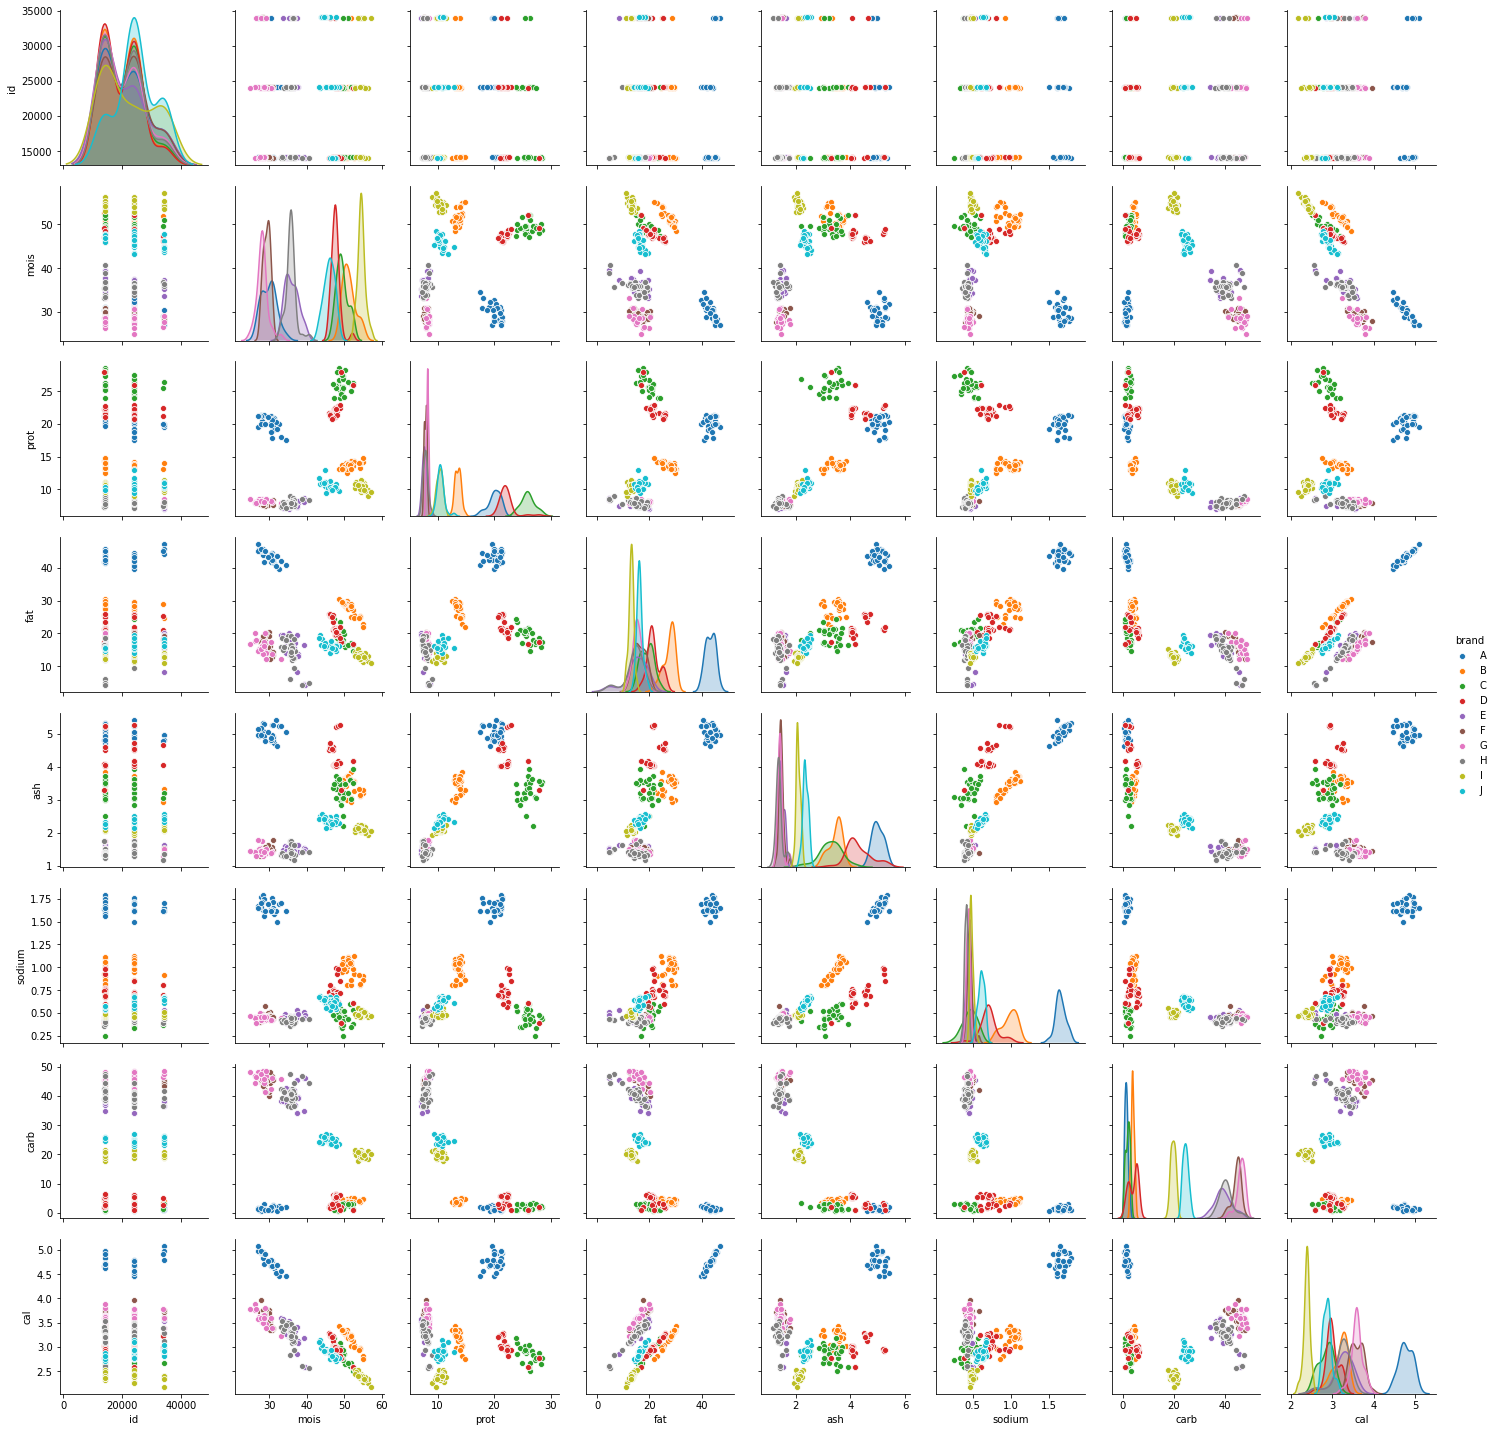

In [72]:
sns.pairplot(data=dfn, diag_kind="kde", hue="brand")

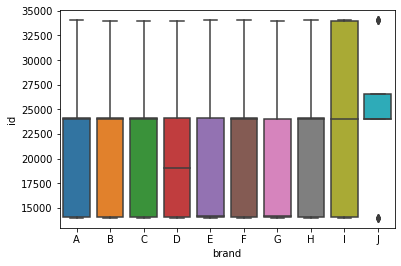

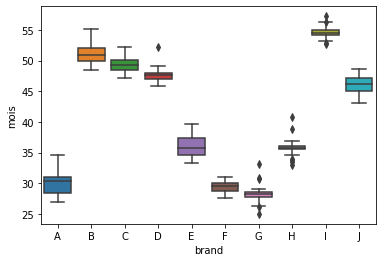

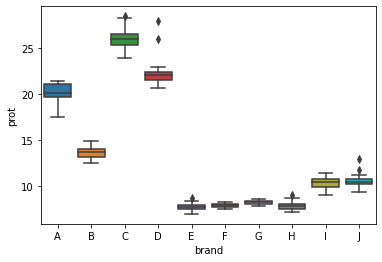

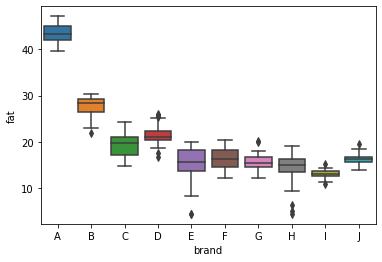

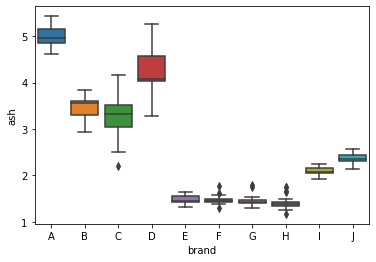

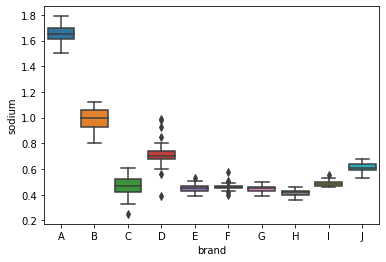

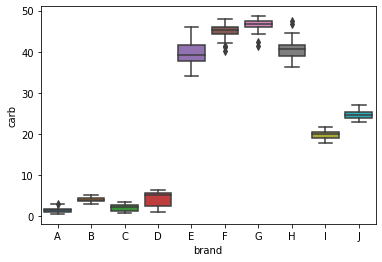

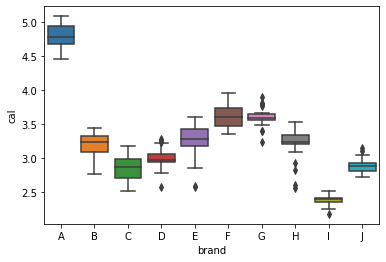

In [70]:
features = list(dfn.columns)
features.remove('brand')
for column in features:
    sns.boxplot(data = dfn, x = 'brand', y=column)
    plt.show()

---
---
# _Data Preprocessing for price prediction :_

In [74]:
df.tail()

,Pizza,diameter,topping,variant,size,extra_sauce,extra_cheese,price_inr
124,SalsPizzaB99,8.5,tuna,spicy tuna,small,yes,yes,201.6
125,SalsPizzaB99,12.0,tuna,spicy tuna,medium,yes,yes,372.1
126,SalsPizzaB99,14.0,tuna,spicy tuna,large,yes,yes,511.6
127,SalsPizzaB99,8.5,meat,BBQ_meat_fiesta,small,yes,no,227.4
128,SalsPizzaB99,12.0,meat,BBQ_meat_fiesta,medium,no,no,403.1


### _Using LabelEncoder_

In [91]:
from sklearn.preprocessing import LabelEncoder

In [92]:
labelEncoder = LabelEncoder()

In [95]:
df['Pizza'] = labelEncoder.fit_transform(df['Pizza'])

df['topping'] = labelEncoder.fit_transform(df['topping'])

df['variant'] = labelEncoder.fit_transform(df['variant'])

df['size'] = labelEncoder.fit_transform(df['size'])

df['extra_sauce'] = labelEncoder.fit_transform(df['extra_sauce'])

df['extra_cheese'] = labelEncoder.fit_transform(df['extra_cheese'])

In [99]:
df.describe()

,Pizza,diameter,topping,variant,size,extra_sauce,extra_cheese,price_inr
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,2.031008,12.976744,5.294574,8.155039,2.868217,0.589147,0.666667,450.390698
std,1.462756,3.272674,3.204984,5.265527,1.470437,0.493907,0.473242,231.039615
min,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.400000
25%,1.000000,12.000000,2.000000,4.000000,2.000000,0.000000,0.000000,263.600000
50%,2.000000,12.000000,5.000000,6.000000,3.000000,1.000000,1.000000,403.100000
75%,3.000000,14.000000,9.000000,13.000000,4.000000,1.000000,1.000000,542.600000
max,4.000000,22.000000,11.000000,19.000000,5.000000,1.000000,1.000000,1281.700000


In [97]:
df['Pizza'] = df['Pizza'].astype('float64')

df['topping'] = df['topping'].astype('float64')

df['variant'] = df['variant'].astype('float64')

df['size'] = df['size'].astype('float64')

df['extra_sauce'] = df['extra_sauce'].astype('float64')

df['extra_cheese'] = df['extra_cheese'].astype('float64')

---
## _Independent and dependent features :_

In [103]:
X = df.drop(['price_inr'], axis=1)

In [105]:
y = df['price_inr']

In [107]:
y.head()

0    1214.5
1    1023.3
2     620.2
3     801.0
4    1281.7
Name: price_inr, dtype: float64

## _Train-Test Split_

In [108]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=22)

---
# Making the Model 


# _Using Linear Regression:_

In [111]:
 from sklearn import linear_model

In [112]:
linreg =linear_model.LinearRegression()
linreg_model = linreg.fit(X_train,y_train)

In [113]:
linreg_pred =linreg_model.predict(X_test)

### _Plotting the Prediction of Linear Regression Model_

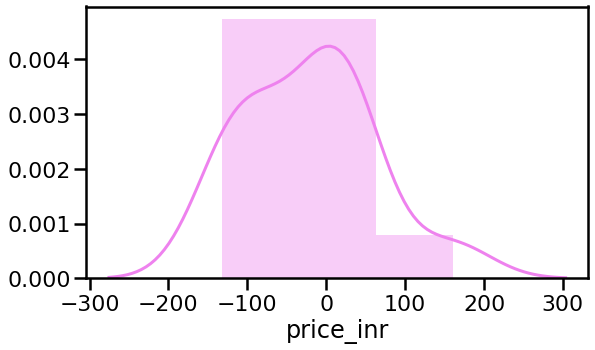

In [127]:
 plt.figure(figsize=(9,5))
sns.distplot(y_test-linreg_pred, color ="violet")

In [117]:
from sklearn import metrics

In [118]:
print('Mean Absolute Error of Linear Regresson:', metrics.mean_absolute_error(y_test, linreg_pred))

Mean Absolute Error of Linear Regresson: 65.29467031556015


In [119]:
print('Root Mean Squared Error of Linear Regresson:', np.sqrt(metrics.mean_squared_error(y_test, linreg_pred)))

Root Mean Squared Error of Linear Regresson: 82.54670280262317


### _And the best fit line for Linear Regressor Prediction:_

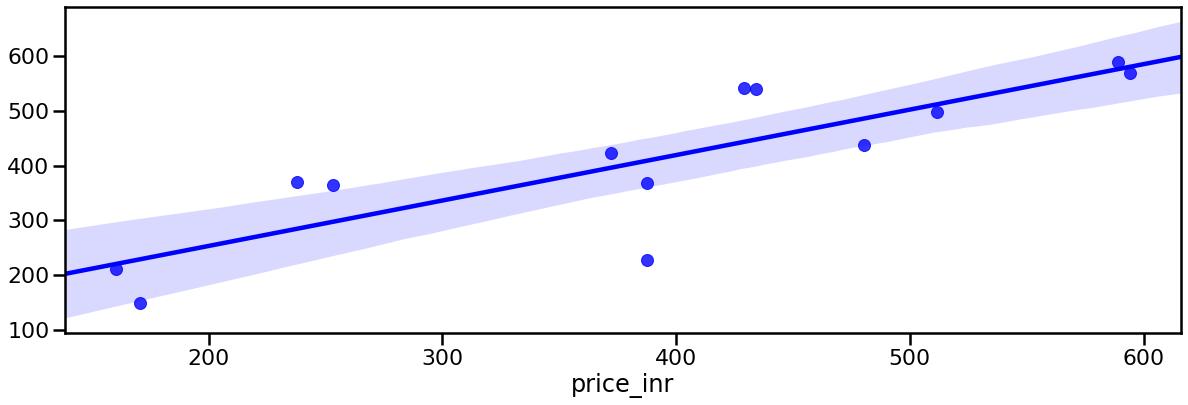

In [147]:
plt.figure(figsize=(20,6))
sns.set_context('poster')
sns.regplot(y_test,linreg_pred, color ='blue')

---
---
---
# _Using XGBoost Regressor:_
---

In [120]:
from xgboost import XGBRegressor

In [121]:
xgb_reg = XGBRegressor(learning_rate=1.0, n_estimators=1000, n_jobs=16, max_depth=6, min_child_weight=40, seed=0,booster='gbtree')

In [122]:
xgb_model = xgb_reg.fit(X_train, y_train)

In [123]:
 xgb_pred =xgb_model.predict(X_test)

In [124]:
 xgb_pred

array([713.9641 , 542.41766, 329.45425, 217.47879, 236.21115, 570.7905 ,
       368.8359 , 217.47879, 458.81543, 264.58398, 532.13245, 532.13245,
       350.10367], dtype=float32)

## _Plotting the Prediction of XGBoost Regression Model_

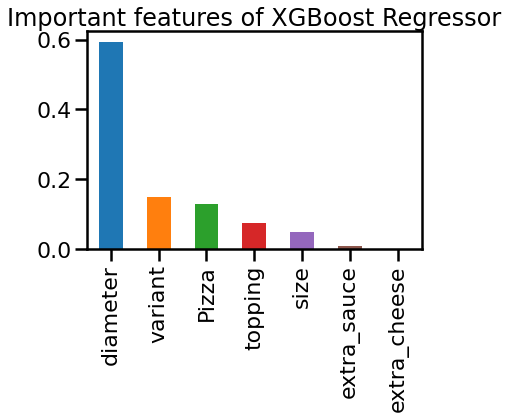

In [126]:
xgb_features = pd.Series(xgb_model.feature_importances_, X.columns).sort_values(ascending=False)
sns.set_context('poster')
xgb_features.plot(kind='bar', title='Important features of XGBoost Regressor')

In [128]:
print('Mean Absolute Error of XGBoost:', metrics.mean_absolute_error(y_test, xgb_pred))

Mean Absolute Error of XGBoost: 76.79289926382212


In [129]:
print('Root Mean Squared Error of XGBoost:', np.sqrt(metrics.mean_squared_error(y_test, xgb_pred)))

Root Mean Squared Error of XGBoost: 89.22572386540475


### _And the best fit line for XGBoost Regressor Prediction:_

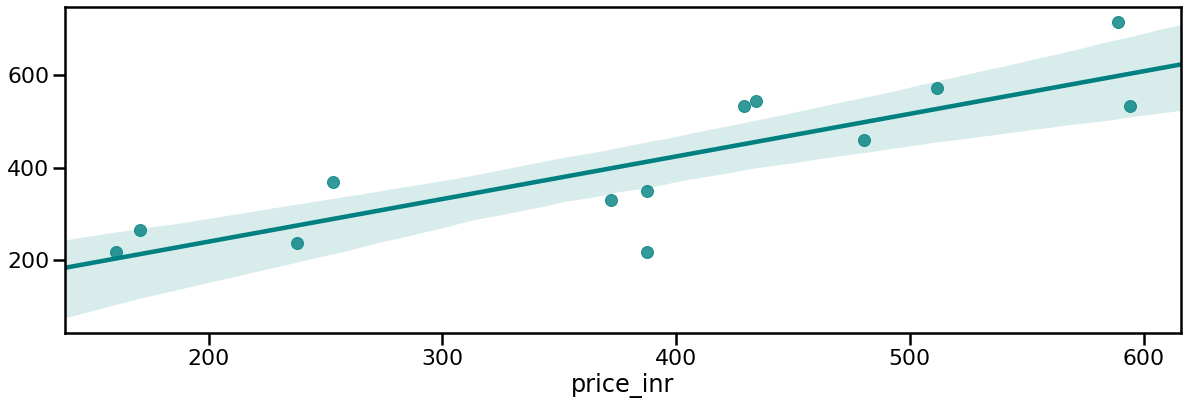

In [149]:
plt.figure(figsize=(20,6))
sns.set_context('poster')
sns.regplot(y_test,xgb_pred, color ='teal')

---
---
---
# _Using Random Forest Regressor:_
---

In [132]:
from sklearn.ensemble import RandomForestRegressor

In [133]:
rf = RandomForestRegressor(n_jobs=-1)
rf_model = rf.fit(X_train,y_train)

In [134]:
rf_pred =rf_model.predict(X_test)

In [135]:
rf_pred

array([592.489, 492.323, 418.812, 254.105, 257.396, 536.643, 302.724,
       157.687, 454.405, 178.474, 438.824, 581.484, 369.301])

### _Plotting the Prediction of RandomForest Regression Model_


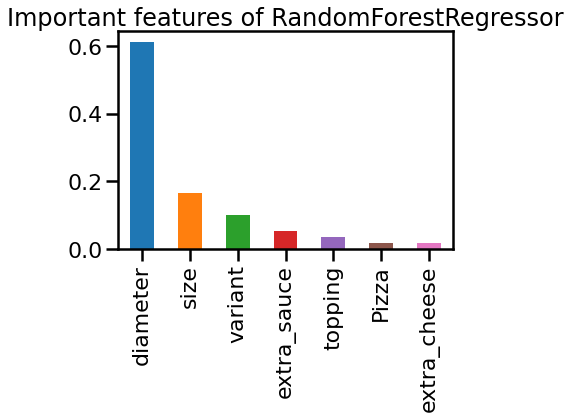

In [138]:
rf_features = pd.Series(rf_model.feature_importances_, X.columns).sort_values(ascending=False)
rf_features.plot(kind='bar', title='Important features of RandomForestRegressor')

In [139]:
print('Mean Absolute Error of Random Forest Regressor:', metrics.mean_absolute_error(y_test, rf_pred))

Mean Absolute Error of Random Forest Regressor: 31.830999999999918


In [140]:
print('Root Mean Squared Errorof Random Forest Regressor :', np.sqrt(metrics.mean_squared_error(y_test, rf_pred)))

Root Mean Squared Errorof Random Forest Regressor : 46.596225303542084


### _And the best fit line for RandomForest Regressor Prediction:_

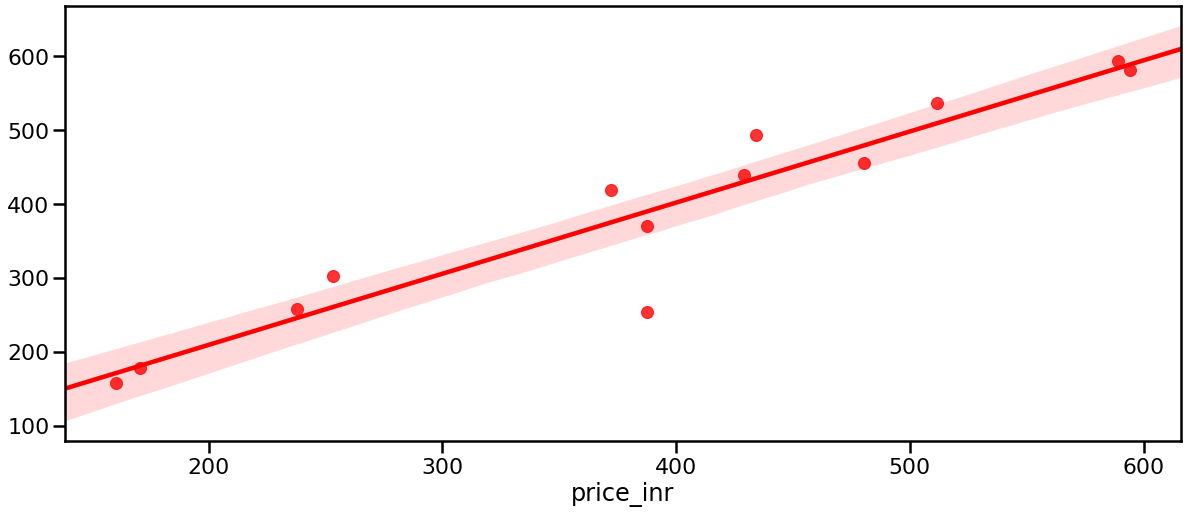

In [144]:
plt.figure(figsize=(20,8))
sns.set_context('poster')
sns.regplot(y_test,rf_pred, color ='red')

---
---
---
# _Conclusion:_

## _I have done Analysis as well as visualization of the Dataset.<br><br>And I have Trained the model using:_


- # Linear Regression
- # XGBoost Regressor
- # Random Forest Regressior


## _And From the above three trained Models, It can be seen that<br>the RANDOM FOREST Regressor model performed better than<br> the XGBoostRegressor and Linear Regressor Model._
